In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
import numpy as np
import pandas as pd
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt

In [45]:
# load dataset as pandas dataframe

df = get_data('gexp').data
df.head(2)

# variables A to F denotes multiple conditions associated with fungal stress
# Read full paper https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0138025

,A,B,C,D,E,F
0,4.50570,3.26036,-1.24940,8.89807,8.05955,-0.842803
1,3.50856,1.66079,-1.85668,-2.57336,-1.37370,1.196000


In [46]:
# this is an optional step
df_st =  StandardScaler().fit_transform(df)  
pd.DataFrame(df_st, columns=df.columns).head(2)

,A,B,C,D,E,F
0,0.619654,0.448280,-0.240867,2.457058,2.304732,-0.331489
1,0.342286,-0.041499,-0.428652,-1.214732,-0.877151,0.474930


In [47]:
# this is an optional step
df_st =  StandardScaler().fit_transform(df)  
pd.DataFrame(df_st, columns=df.columns).head(2)
pca_out = PCA().fit(df_st)

In [48]:
pca_out.explained_variance_ratio_
# Cumulative proportion of variance (from PC1 to PC6)   

array([0.2978742 , 0.27481252, 0.23181442, 0.19291638, 0.00144353,
       0.00113895])

In [49]:
np.cumsum(pca_out.explained_variance_ratio_)    

array([0.2978742 , 0.57268672, 0.80450114, 0.99741752, 0.99886105,
       1.        ])

In [50]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
A,-0.510898,0.452234,0.227356,-0.323464,0.614881,0.008372
B,-0.085908,0.401197,0.708556,0.132788,-0.558448,-0.010616
C,0.477477,-0.100994,0.462437,0.487951,0.556605,0.007893
D,0.370318,0.611485,-0.308295,0.054973,-0.007642,0.625159
E,0.568491,0.300118,-0.011775,-0.484115,0.009382,-0.593425
F,0.208090,-0.400426,0.370440,-0.634234,-0.010111,0.506732


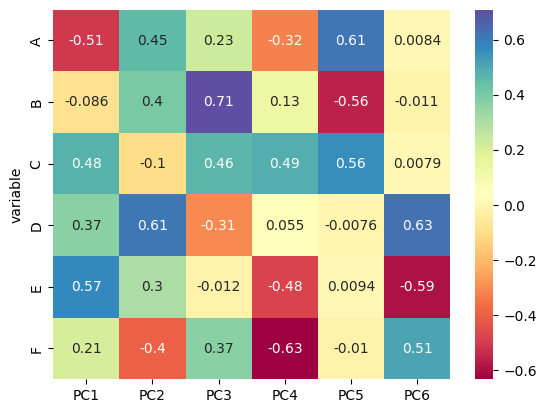

In [51]:
# get correlation matrix plot for loadings
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [52]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

array([1.78994905, 1.65136965, 1.39299071, 1.15924943, 0.0086743 ,
       0.00684401])

In [55]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])


In [56]:
# get PCA loadings plots (2D and 3D)
# 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

# 3D
cluster.pcaplot(x=loadings[0], y=loadings[1], z=loadings[2],  labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

In [ ]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))
    
# get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2))